In [0]:
#Import Dependencies
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import keras as keras
import time
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, ReLU, ELU
from numpy.random import seed
from tensorflow import set_random_seed
from keras import backend as K
#K.tensorflow_backend._get_available_gpus()

In [0]:
#Useful Functions
#Removes metadata and filters by regex. Output: Features, Targets and Feature&Target Dataframe.
def clean_data(input_dataframe, drop_columns):
  
  feature_target_dataframe = input_dataframe.drop(columns = drop_columns)
  feature_dataframe = feature_target_dataframe.filter(regex = 'feature', axis = 1)
  target_dataframe = feature_target_dataframe.filter(regex = 'target', axis = 1)
  
  return feature_dataframe, target_dataframe, feature_target_dataframe

#Pick a randomized value from an input list
def randomize(input_list):
  
  list_index = np.random.randint(len(input_list))
  
  return input_list[list_index]

#Build a list from a list of features
def build_gene(gene_feature_list):
  
  gene = []
  for i in range(len(gene_feature_list)):
    gene.append(randomize(gene_feature_list[i]))
    
  return gene

#Gene Selector. Either build a new one or selects one from gene pool.
def gene_selector(mutation_factor, gene_list, gene_pool):
  
  #Do not select from gene pool if its empty.
  if len(gene_pool) == 0:
      gene = build_gene(gene_list)
  else:
    random_number = np.random.random()
    if random_number < mutation_factor:
      gene = build_gene(gene_list)
    else:
      gene = randomize(gene_pool)
        
  return gene

#Takes the top few using the ranked_cutoff and its accuracy metric
def ActivationLayer(activation_layer_name):
  
  if activation_layer_name == 'relu':
    model.add(ReLU(max_value = None, negative_slope = 0.0, threshold = 0.0))
  elif activation_layer_name == 'leaky':
    model.add(LeakyReLU(alpha = 0.3))
  elif activation_layer_name == 'elu':
    model.add(ELU(alpha = 1.0))
  
#To fit, predict and output to csv.
def run_predictions(fit_feature, fit_target, test_feature, test_target, test_id,
                    output_file_name = 'prediction', epochs = 100, batch_size = 4096):
  
  model.fit(fit_feature, fit_target, epochs = epochs, batch_size = batch_size, verbose = 2,
          shuffle = False, validation_data = [test_feature[0:56084], test_target[0:56084]])

  prediction = model.predict(test_feature, batch_size = batch_size)

  for i in prediction.transpose():
    prediction_series = pd.Series(i)

  output_df = pd.DataFrame([test_id, prediction_series]).transpose()
  output_df.to_csv(output_file_name + '.csv', index = False)
  print("Done outputing to {}.csv".format(output_file_name))


#Set Random Seed
seed(1)
set_random_seed(1)

#Import Data
train_data = pd.read_csv('numerai_training_data.csv')
test_data = pd.read_csv('numerai_tournament_data.csv')

#Clean Data. Seperate into features and targets
features_X, targets_X, X = clean_data(train_data, ['id', 'era', 'data_type'])
features_Y, targets_Y, Y = clean_data(test_data, ['id', 'era', 'data_type'])

target_bernie_X = targets_X['target_bernie']
target_bernie_Y = targets_Y['target_bernie']

target_ken_X = targets_X['target_ken']
target_ken_Y = targets_Y['target_ken']

target_charles_X = targets_X['target_charles']
target_charles_Y = targets_Y['target_charles']

target_frank_X = targets_X['target_frank']
target_frank_Y = targets_Y['target_frank']

target_hillary_X = targets_X['target_hillary']
target_hillary_Y = targets_Y['target_hillary']

Training NNs now...
NN Number: 1. Training time: 12.83 s
NN Number: 2. Training time: 12.96 s
NN Number: 3. Training time: 12.77 s
NN Number: 4. Training time: 13.32 s
NN Number: 5. Training time: 12.91 s
NN Number: 6. Training time: 13.85 s
NN Number: 7. Training time: 14.07 s
NN Number: 8. Training time: 13.3 s
NN Number: 9. Training time: 13.44 s
NN Number: 10. Training time: 13.39 s
NN Number: 11. Training time: 13.5 s
NN Number: 12. Training time: 14.25 s
NN Number: 13. Training time: 14.41 s
NN Number: 14. Training time: 14.95 s
NN Number: 15. Training time: 15.23 s
NN Number: 16. Training time: 14.81 s
NN Number: 17. Training time: 15.4 s
NN Number: 18. Training time: 15.35 s
NN Number: 19. Training time: 14.68 s
NN Number: 20. Training time: 14.89 s
NN Number: 21. Training time: 15.06 s
NN Number: 22. Training time: 15.3 s
NN Number: 23. Training time: 16.67 s
NN Number: 24. Training time: 15.55 s
NN Number: 25. Training time: 15.53 s
NN Number: 26. Training time: 15.66 s
NN Nu

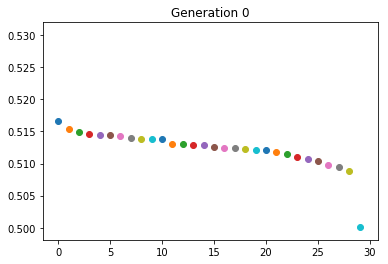

   Accuracy                                              Genes
0  0.516654  [[32, elu, 0.5], [32, elu, 0.5], [32, relu, 0.1]]
1  0.515298  [[32, relu, 0.1], [32, elu, 0.5], [32, relu, 0...
2  0.514853  [[32, elu, 0.5], [32, relu, 0.1], [32, elu, 0.2]]
3  0.514674   [[32, elu, 0.5], [32, elu, 0.5], [32, elu, 0.5]]
4  0.514407   [[32, elu, 0.5], [32, elu, 0.5], [32, elu, 0.5]]
NN Number: 1. Training time: 16.49 s
NN Number: 2. Training time: 17.5 s
NN Number: 3. Training time: 17.67 s
NN Number: 4. Training time: 17.15 s
NN Number: 5. Training time: 18.14 s
NN Number: 6. Training time: 17.42 s
NN Number: 7. Training time: 18.25 s
NN Number: 8. Training time: 18.41 s
NN Number: 9. Training time: 18.86 s
NN Number: 10. Training time: 18.07 s
NN Number: 11. Training time: 18.29 s
NN Number: 12. Training time: 19.25 s
NN Number: 13. Training time: 18.44 s
NN Number: 14. Training time: 18.73 s
NN Number: 15. Training time: 19.52 s
NN Number: 16. Training time: 20.23 s
NN Number: 17. Training 

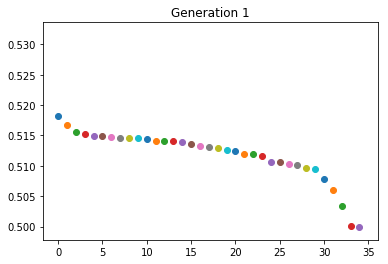

   Accuracy                                              Genes
0  0.518187  [[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]
1  0.516654  [[32, elu, 0.5], [32, elu, 0.5], [32, relu, 0.1]]
2  0.515619  [[32, elu, 0.5], [32, elu, 0.5], [32, relu, 0.1]]
3  0.515298  [[32, relu, 0.1], [32, elu, 0.5], [32, relu, 0...
4  0.514888   [[32, elu, 0.5], [32, elu, 0.5], [32, elu, 0.5]]
NN Number: 1. Training time: 23.71 s
NN Number: 2. Training time: 22.58 s
NN Number: 3. Training time: 22.04 s
NN Number: 4. Training time: 22.35 s
NN Number: 5. Training time: 24.37 s
NN Number: 6. Training time: 22.72 s
NN Number: 7. Training time: 24.04 s
NN Number: 8. Training time: 24.8 s
NN Number: 9. Training time: 23.24 s
NN Number: 10. Training time: 23.61 s
NN Number: 11. Training time: 24.04 s
NN Number: 12. Training time: 24.26 s
NN Number: 13. Training time: 24.3 s
NN Number: 14. Training time: 25.0 s
NN Number: 15. Training time: 25.24 s
NN Number: 16. Training time: 24.63 s
NN Number: 17. Training ti

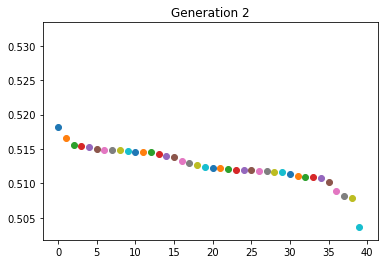

   Accuracy                                              Genes
0  0.518187  [[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]
1  0.516654  [[32, elu, 0.5], [32, elu, 0.5], [32, relu, 0.1]]
2  0.515619  [[32, elu, 0.5], [32, elu, 0.5], [32, relu, 0.1]]
3  0.515459  [[32, elu, 0.5], [32, elu, 0.5], [32, relu, 0.1]]
4  0.515298  [[32, relu, 0.1], [32, elu, 0.5], [32, relu, 0...
NN Number: 1. Training time: 27.35 s
NN Number: 2. Training time: 27.56 s
NN Number: 3. Training time: 28.61 s
NN Number: 4. Training time: 27.97 s
NN Number: 5. Training time: 28.43 s
NN Number: 6. Training time: 29.31 s
NN Number: 7. Training time: 28.91 s
NN Number: 8. Training time: 29.96 s
NN Number: 9. Training time: 29.51 s
NN Number: 10. Training time: 30.38 s
NN Number: 11. Training time: 30.43 s
NN Number: 12. Training time: 29.54 s
NN Number: 13. Training time: 30.71 s
NN Number: 14. Training time: 30.84 s
NN Number: 15. Training time: 30.3 s
NN Number: 16. Training time: 31.29 s
NN Number: 17. Training 

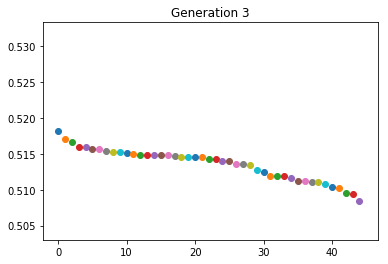

   Accuracy                                              Genes
0  0.518187  [[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]
1  0.517099  [[32, elu, 0.5], [32, relu, 0.1], [32, elu, 0.5]]
2  0.516654  [[32, elu, 0.5], [32, elu, 0.5], [32, relu, 0.1]]
3  0.515958  [[32, relu, 0.1], [32, elu, 0.5], [32, relu, 0...
4  0.515940  [[32, relu, 0.1], [32, relu, 0.1], [32, elu, 0...
NN Number: 1. Training time: 35.0 s
NN Number: 2. Training time: 34.21 s
NN Number: 3. Training time: 35.56 s
NN Number: 4. Training time: 35.86 s
NN Number: 5. Training time: 34.99 s
NN Number: 6. Training time: 35.82 s
NN Number: 7. Training time: 35.51 s
NN Number: 8. Training time: 36.7 s
NN Number: 9. Training time: 36.75 s
NN Number: 10. Training time: 37.11 s
NN Number: 11. Training time: 36.49 s
NN Number: 12. Training time: 38.28 s
NN Number: 13. Training time: 37.28 s
NN Number: 14. Training time: 37.21 s
NN Number: 15. Training time: 37.93 s
NN Number: 16. Training time: 37.56 s
NN Number: 17. Training t

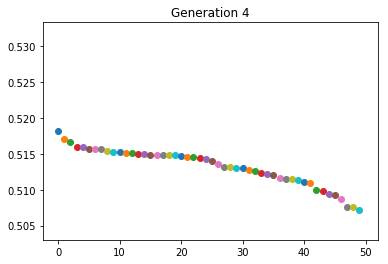

   Accuracy                                              Genes
0  0.518187  [[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]
1  0.517099  [[32, elu, 0.5], [32, relu, 0.1], [32, elu, 0.5]]
2  0.516654  [[32, elu, 0.5], [32, elu, 0.5], [32, relu, 0.1]]
3  0.515958  [[32, relu, 0.1], [32, elu, 0.5], [32, relu, 0...
4  0.515940  [[32, relu, 0.1], [32, relu, 0.1], [32, elu, 0...
NN Number: 1. Training time: 41.87 s
NN Number: 2. Training time: 42.75 s
NN Number: 3. Training time: 42.4 s
NN Number: 4. Training time: 42.93 s
NN Number: 5. Training time: 43.44 s
NN Number: 6. Training time: 43.11 s
NN Number: 7. Training time: 43.11 s
NN Number: 8. Training time: 43.71 s
NN Number: 9. Training time: 43.46 s
NN Number: 10. Training time: 45.03 s
NN Number: 11. Training time: 43.65 s
NN Number: 12. Training time: 45.28 s
NN Number: 13. Training time: 43.98 s
NN Number: 14. Training time: 44.87 s
NN Number: 15. Training time: 44.51 s
NN Number: 16. Training time: 46.08 s
NN Number: 17. Training 

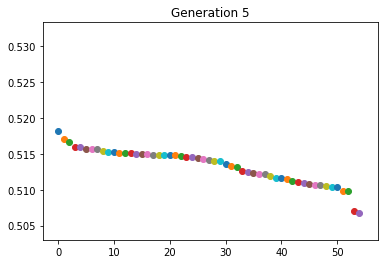

   Accuracy                                              Genes
0  0.518187  [[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]
1  0.517099  [[32, elu, 0.5], [32, relu, 0.1], [32, elu, 0.5]]
2  0.516654  [[32, elu, 0.5], [32, elu, 0.5], [32, relu, 0.1]]
3  0.515958  [[32, relu, 0.1], [32, elu, 0.5], [32, relu, 0...
4  0.515940  [[32, relu, 0.1], [32, relu, 0.1], [32, elu, 0...
NN Number: 1. Training time: 49.44 s
NN Number: 2. Training time: 49.91 s
NN Number: 3. Training time: 49.52 s
NN Number: 4. Training time: 50.19 s
NN Number: 5. Training time: 49.73 s
NN Number: 6. Training time: 51.34 s
NN Number: 7. Training time: 51.34 s
NN Number: 8. Training time: 50.85 s
NN Number: 9. Training time: 51.44 s
NN Number: 10. Training time: 51.84 s
NN Number: 11. Training time: 51.39 s
NN Number: 12. Training time: 52.96 s
NN Number: 13. Training time: 54.21 s
NN Number: 14. Training time: 52.56 s
NN Number: 15. Training time: 53.18 s
NN Number: 16. Training time: 52.88 s
NN Number: 17. Training

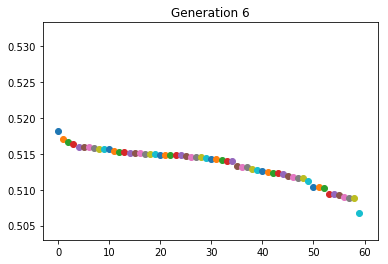

   Accuracy                                              Genes
0  0.518187  [[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]
1  0.517099  [[32, elu, 0.5], [32, relu, 0.1], [32, elu, 0.5]]
2  0.516654  [[32, elu, 0.5], [32, elu, 0.5], [32, relu, 0.1]]
3  0.516440  [[32, relu, 0.1], [32, elu, 0.5], [32, relu, 0...
4  0.515976  [[32, elu, 0.5], [32, relu, 0.1], [32, relu, 0...
NN Number: 1. Training time: 57.6 s
NN Number: 2. Training time: 58.27 s
NN Number: 3. Training time: 57.3 s
NN Number: 4. Training time: 59.57 s
NN Number: 5. Training time: 58.62 s
NN Number: 6. Training time: 60.08 s
NN Number: 7. Training time: 59.08 s
NN Number: 8. Training time: 59.25 s
NN Number: 9. Training time: 61.04 s
NN Number: 10. Training time: 60.12 s
NN Number: 11. Training time: 60.39 s
NN Number: 12. Training time: 60.59 s
NN Number: 13. Training time: 61.05 s
NN Number: 14. Training time: 61.11 s
NN Number: 15. Training time: 61.59 s
NN Number: 16. Training time: 63.13 s
NN Number: 17. Training t

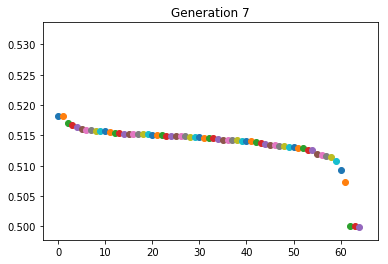

   Accuracy                                              Genes
0  0.518187  [[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]
1  0.518134  [[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]
2  0.517099  [[32, elu, 0.5], [32, relu, 0.1], [32, elu, 0.5]]
3  0.516654  [[32, elu, 0.5], [32, elu, 0.5], [32, relu, 0.1]]
4  0.516440  [[32, relu, 0.1], [32, elu, 0.5], [32, relu, 0...
NN Number: 1. Training time: 68.41 s
NN Number: 2. Training time: 66.51 s
NN Number: 3. Training time: 67.7 s
NN Number: 4. Training time: 69.26 s
NN Number: 5. Training time: 67.87 s
NN Number: 6. Training time: 68.09 s
NN Number: 7. Training time: 68.83 s
NN Number: 8. Training time: 70.22 s
NN Number: 9. Training time: 70.12 s
NN Number: 10. Training time: 69.32 s
NN Number: 11. Training time: 69.78 s
NN Number: 12. Training time: 70.12 s
NN Number: 13. Training time: 71.34 s
NN Number: 14. Training time: 70.63 s
NN Number: 15. Training time: 70.92 s
NN Number: 16. Training time: 71.34 s
NN Number: 17. Training 

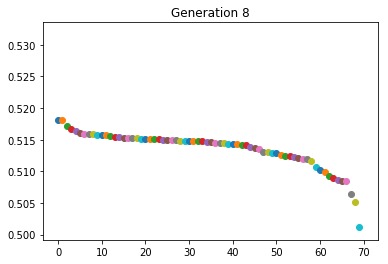

   Accuracy                                              Genes
0  0.518187  [[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]
1  0.518134  [[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]
2  0.517099  [[32, elu, 0.5], [32, relu, 0.1], [32, elu, 0.5]]
3  0.516654  [[32, elu, 0.5], [32, elu, 0.5], [32, relu, 0.1]]
4  0.516440  [[32, relu, 0.1], [32, elu, 0.5], [32, relu, 0...
NN Number: 1. Training time: 75.93 s
NN Number: 2. Training time: 76.41 s
NN Number: 3. Training time: 76.88 s
NN Number: 4. Training time: 78.7 s
NN Number: 5. Training time: 77.51 s
NN Number: 6. Training time: 77.9 s
NN Number: 7. Training time: 78.18 s
NN Number: 8. Training time: 79.53 s
NN Number: 9. Training time: 78.67 s
NN Number: 10. Training time: 79.15 s
NN Number: 11. Training time: 79.55 s
NN Number: 12. Training time: 80.46 s
NN Number: 13. Training time: 79.97 s
NN Number: 14. Training time: 80.46 s
NN Number: 15. Training time: 81.33 s
NN Number: 16. Training time: 81.83 s
NN Number: 17. Training t

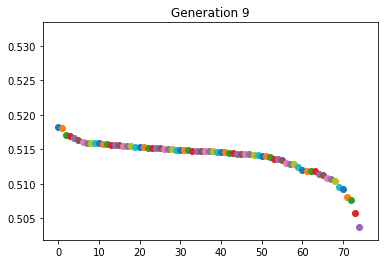

   Accuracy                                              Genes
0  0.518187  [[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]
1  0.518134  [[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]
2  0.517099  [[32, elu, 0.5], [32, relu, 0.1], [32, elu, 0.5]]
3  0.516903  [[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]
4  0.516654  [[32, elu, 0.5], [32, elu, 0.5], [32, relu, 0.1]]


In [0]:
#Multiple Layer Feed Forward - multiple randomized networks
#Genes
neuron_counts = [32, 64, 128, 256]
activation_functions = ['relu', 'elu', 'leaky']
dropout_values = [0.1, 0.2, 0.5]
gene_list = [neuron_counts, activation_functions, dropout_values]

#Hidden Layers
#hidden_layer_count = [1, 2, 3]

#Constants
number_of_NN = 30
number_of_epoch = 20
number_of_generation = 10
batch_size = 4096
mutation_factor = 0.1
input_dimension = len(features_X.columns)

#Start with empty gene pool. Gene pool can be initialised with some values.
gene_pool = [[32, 'relu', 0.1], [32, 'elu', 0.5], [32, 'elu', 0.5]]
score_card = []

print('Training NNs now...')
for n in range(number_of_generation):
  for i in range(number_of_NN):
    start_time = time.time()

    gene_output = []
    hidden_layers = 3
    
    gene = gene_selector(mutation_factor, gene_list, gene_pool)
      
    gene_output.append(gene)
    
    neuron, activation, dropout = gene

    model = Sequential()
    model.add(Dense(neuron, input_dim=input_dimension))
    ActivationLayer(activation)
    model.add(Dropout(dropout))

    if hidden_layers != 1:
      for j in range(hidden_layers-1):
        
        gene = gene_selector(mutation_factor, gene_list, gene_pool)
            
        gene_output.append(gene)

        neuron, activation, dropout = gene

        model.add(Dense(neuron))
        ActivationLayer(activation)
        model.add(Dropout(dropout))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(features_X, target_bernie_X, epochs = number_of_epoch, batch_size = batch_size, verbose = 0,
              shuffle = False, validation_split = 0.3)

    score = model.evaluate(features_Y[0:56084], target_bernie_Y[0:56084], batch_size = batch_size, verbose = 0)
    score_card.append([score[1], gene_output])

    end_time = time.time()
    print('NN Number: {}. Training time: {} s'.format(i+1, round(end_time - start_time, 2)))

  #Insert scores and genes into dataframe and arrange in descending order.
  df = pd.DataFrame(score_card, columns = ['Accuracy', 'Genes']).sort_values(by = 'Accuracy', ascending = False)
  df = df.reset_index(drop = True)
  
  #Plots scores of each gene and displays top 5 genes in dataframe.
  for i in range(len(df['Accuracy'])):
    plt.scatter(i, df['Accuracy'][i])
  plt.title('Generation {}'.format(n))
  plt.show()
  print(df.head())
  
  #Constructs a pool of genes from the top 5 performing NNs
  gene_pool = []
  ranked_cutoff = 5
  for i in range(ranked_cutoff):
    for j in range(len(df['Genes'][i])):
      gene_pool.append(df['Genes'][i][j])
  
  #Keeps the top 5 result of every run
  score_card = df[0:(5*(n+1))].values.tolist()

In [0]:
df

,Accuracy,Genes
0,0.518187,"[[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]"
1,0.518134,"[[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]"
2,0.517099,"[[32, elu, 0.5], [32, relu, 0.1], [32, elu, 0.5]]"
3,0.516903,"[[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]"
4,0.516654,"[[32, elu, 0.5], [32, elu, 0.5], [32, relu, 0.1]]"
5,0.516440,"[[32, relu, 0.1], [32, elu, 0.5], [32, relu, 0..."
6,0.516101,"[[32, elu, 0.5], [32, relu, 0.1], [32, relu, 0..."
7,0.515976,"[[32, elu, 0.5], [32, relu, 0.1], [32, relu, 0..."
8,0.515958,"[[32, relu, 0.1], [32, elu, 0.5], [32, relu, 0..."
9,0.515940,"[[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]]"


[[32, 'relu', 0.1], [32, 'tanh', 0.1], [256, 'tanh', 0.1]] --> 19/05 Setup (Resolved)

[[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]] --> 27/05 Setup

Lugwig --> 02/06 Setup

[[32, relu, 0.1], [32, elu, 0.5], [32, elu, 0.5]] with Era Tuning --> 10/06 Setup

[[64, relu, 0.2], [64, relu, 0.2], [64, relu, 0.]] --> 17/06 Setup

[[32, relu, 0.1], [64, elu, 0.5], [64, elu, 0.5]]

In [0]:
#Apply Best model (Manual Input)
model = Sequential()
model.add(Dense(32, input_dim=50))
ActivationLayer('relu')
model.add(Dropout(0.1))
model.add(Dense(32))
ActivationLayer('elu')
model.add(Dropout(0.5))
model.add(Dense(32))
ActivationLayer('elu')
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Run predictions and Output to Csv
run_predictions(features_X, target_bernie_X, features_Y, target_bernie_Y, test_data['id'], 'prediction_bernie', 100, 4096)
run_predictions(features_X, target_ken_X, features_Y, target_ken_Y, test_data['id'], 'prediction_ken', 100, 4096)
run_predictions(features_X, target_charles_X, features_Y, target_charles_Y, test_data['id'], 'prediction_charles', 100, 4096)
run_predictions(features_X, target_frank_X, features_Y, target_frank_Y, test_data['id'], 'prediction_frank', 100, 4096)
run_predictions(features_X, target_hillary_X, features_Y, target_hillary_Y, test_data['id'], 'prediction_hillary', 100, 4096)

Train on 502732 samples, validate on 56084 samples
Epoch 1/100
 - 59s - loss: 0.6985 - acc: 0.5033 - val_loss: 0.6928 - val_acc: 0.5120
Epoch 2/100
 - 2s - loss: 0.6932 - acc: 0.5051 - val_loss: 0.6925 - val_acc: 0.5171
Epoch 3/100
 - 2s - loss: 0.6931 - acc: 0.5054 - val_loss: 0.6925 - val_acc: 0.5166
Epoch 4/100
 - 2s - loss: 0.6931 - acc: 0.5053 - val_loss: 0.6926 - val_acc: 0.5141
Epoch 5/100
 - 2s - loss: 0.6930 - acc: 0.5083 - val_loss: 0.6923 - val_acc: 0.5165
Epoch 6/100
 - 2s - loss: 0.6930 - acc: 0.5075 - val_loss: 0.6924 - val_acc: 0.5155
Epoch 7/100
 - 2s - loss: 0.6930 - acc: 0.5083 - val_loss: 0.6922 - val_acc: 0.5161
Epoch 8/100
 - 2s - loss: 0.6930 - acc: 0.5089 - val_loss: 0.6922 - val_acc: 0.5162
Epoch 9/100
 - 2s - loss: 0.6930 - acc: 0.5094 - val_loss: 0.6922 - val_acc: 0.5150
Epoch 10/100
 - 2s - loss: 0.6929 - acc: 0.5102 - val_loss: 0.6925 - val_acc: 0.5161
Epoch 11/100
 - 2s - loss: 0.6929 - acc: 0.5107 - val_loss: 0.6925 - val_acc: 0.5150
Epoch 12/100
 - 2s - l